### Quantum Master Equation
The evolution of a density matrix $\rho$ of a quantum system, describing the an open quantum system is given by the Master Equation. 

$$ \frac{\partial \rho}{\partial t} = -i[H,\rho] +\sum_{j=1}^{N_{j}}\kappa \left(c_{j}\rho L_{j}^{\dagger}-\frac{1}{2}\{c_{j}^{\dagger}L_{j},\rho\}\right) \tag{1}$$

where, 
- $c_{j}$ is called the Jump operators/Collapse operators which models the interaction between the system and environment, 
- $H$ is the Hamiltonian of the system. 

The equation (**1**) gives the time evolution of the open quantum systems when the *interaction between the system and environment is very weak*.


**Linblad Map**

$\mathcal{L}$ is called the Linbladian of the quantum system/Linblad Map. The Linblad Map is defined as:

$$\mathcal{L[O]}=-i[H,\mathcal{O}] +\sum_{j=1}^{N_{j}} \kappa  \left(c_{j}\mathcal{O} c_{j}^{\dagger}-\frac{1}{2}\{c_{j}^{\dagger}c_{j},\mathcal{O}\}\right)$$

The Linblad map is composed of two parts:

- $\mathcal{L_{C}}=-i[H,\mathcal{O}]$ governs the coherent dynamics. (_Equivalent to equation of motion of an operator in Heisenberg's picture._)
- $\mathcal{L_{D}}=\sum_{j=1}^{N_{j}} \kappa  \left(c_{j}\mathcal{O} c_{j}^{\dagger}-\frac{1}{2}\{c_{j}^{\dagger}c_{j},\mathcal{O}\}\right)$ governs the dissipative dynamics. Dissipation leads to a loss of coherence or relaxation toward a steady state.



**Properties of the Linblad Map**
- Linblad Map is completely positive and trace preserving map (CPTP Map). 
  
    - Completely Positive Maps preserves the positivity of matrices 
        - _symmetric matrices with eigeneigenvalsues greater than zero_.
    - Trace Preservation ensures that input and output matrices have unit norm 
        - _important since we are working with density matrix whose norm has to be preveserved while applying maps._

**Diagonalization of Linbladian Maps**

Assuming Linbladian Maps to be diagonalizable, we can arrive at an eigenvalue equation:
$$ L[r_k] = \lambda_k r_k \tag{2}$$
where, 

- $r_k$ is known as the right eigenmatrice.
- $\lambda_k$ is the complex eigeneigeneigeneigenvalsssue. 
(_since the Linbladian is non-Hermitian in general_)

Note:

_The positivity of Linbladian ensures that,_
-  _if $\lambda_{k}$ is an eigenvalue then $\lambda_{k}^{*}$ will be an eigenvalue._ (proof?)
- _if $\lambda_{k}$ is real, then $r_{k}$ can be chosen to be Hermitian._ (proof?)

#### Example - 1: Two Level Open Quantum Systems

Consider a single qubit system of Hamiltonian,
$$H = \Delta\hat{S_z} - \Omega\hat{S_x}$$

Let the system be interacting with the environment and the dissipation is given by $c = \kappa \hat{S_{-}}$, where $\kappa$ is the interaction strength.




In [1]:
import qutip as qt
from utils import *
import numpy as np
from IPython.display import Math,display

import matplotlib.pyplot as plt


In [2]:

# Pauli Operators
sx = 0.5*qt.operators.sigmax()
sy = 0.5*qt.operators.sigmay()
sz = 0.5*qt.operators.sigmaz()
I =  qt.operators.identity(2)

# jump operators 
sm = qt.operators.sigmam() # spin-lowering operators
kappa = 1
c_ops = kappa*sm

# Hamiltonian
delta = -1
omega = 1 
ham = delta*sz+omega*sx

# Generating Linbladian
Linbladian = qt.liouvillian(ham,c_ops) 

print("Linbladian of the system \n")
display(Math(qobj_to_latex(Linbladian)))

eigenvals, eigenmat = Linbladian.eigenstates()


#eigenmat = process_qobjs(eigenmat)
rks = [np.reshape(eigenmat[i],(2,2)) for i in range(len(eigenmat))]
eigenvals = process_qobjs(eigenvals)

print("Eigenvalues \n",eigenvals)
# print("Eigenmatrix-1 \n",np.reshape(eigenmat[0],(2,2)))
# print("Eigenmatrix-2 \n",np.reshape(eigenmat[1],(2,2)))
# print("Eigenmatrix-3 \n",np.reshape(eigenmat[2],(2,2)))
# print("Eigenmatrix-4 \n",np.reshape(eigenmat[3],(2,2)))
      

Linbladian of the system 



<IPython.core.display.Math object>

Eigenvalues 
 [-0.7580558724784723, (-0.6209720637607636-1.3866977525296753j), (-0.620972063760763+1.3866977525296744j), 0]


In [3]:
eigenmat

array([Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
       Qobj data =
       [[ 0.507992  +0.j        ]
        [-0.47627547+0.12290568j]
        [-0.47627547-0.12290568j]
        [-0.507992  +0.j        ]]                                                  ,
       Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
       Qobj data =
       [[ 0.3319465 -0.10384403j]
        [ 0.85841332+0.j        ]
        [-0.14092519+0.03636657j]
        [-0.3319465 +0.10384403j]]                                                  ,
       Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
       Qobj data =
       [[ 0.3319465 +0.10384403j]
        [-0.14092519-0.03636657j]
        [ 0.85841332+0.j        ]
        [-0.3319465 -0.10384403j]]                                                  ,
       Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
       Qobj data =
       [[0.14586499+

- The eigenvalues of the Linbladian always have non-positive real part $Re(\lambda_k)<0$.  (Positivity of Maps)
- Atleast one of the eigenvalue to be zero. (Trace preserving by Maps)   

**Dual Map of Linbladian**

We can define a dual map of Linbladian called the adjoint Linblad Map, which implements the evolution of the observables:

$$\mathcal{L^{+}[O]}=-i[H,\mathcal{O}] +\sum_{j=1}^{N_{j}}\kappa \left(c_{j}^{\dagger}\mathcal{O} c_{j}-\frac{1}{2}\{\mathcal{O},c_{j}^{\dagger}c_{j}\}\right)$$

This dual map $\mathcal{L^{+}}$ can be diagonalized by the left eigenmatrices $l_k$ as:
$$\mathcal{L^{+}}[l_k] = \lambda_k l_k$$ 

The left eigenmatrices $l_k$ are in principle different from right eigenmatrices $r_k$, but they still form a basis for the space of matrices  $Tr(l_k r_h) = \delta_{k,h}$. 


In [4]:
eigenvals2, eigenmat2 = Linbladian.dag().eigenstates()

eigenmat2 = process_qobjs(eigenmat2)
lks = [np.reshape(eigenmat2[i],(2,2)) for i in range(len(eigenmat2))] # need to multiply with normalization constant 
eigenvals2 = process_qobjs(eigenvals2)
#display(Math(r'$\text{trace}(l_2 r_1)$'), np.trace(np.dot(lks[1],rks[3])))

#print('Left Eigenmatrix for eigenvalue=0 \n',lks[3])

#### Dynamics of Open Quantum Systems

The quantum master equation (eqn *1*) governs the open quantum system dynamics and can be written in terms of the Linblad Map $\mathcal{L}$.
$$ \dot{\rho_t} = \mathcal{L}[\rho_t] \tag{3}$$

The solution to the eqn. *3* gives the state of the system at time t. $$\rho_{t} = e^{t\mathcal{L}}[\rho_0]$$

The system interacting with environment will undergo dissipation and in time it will loses it quantum coherence approproaching thermal/steady state $\rho_{ss}\rightarrow \lim_{t\rightarrow \infty}\rho_t$. 

**Spectral Decomposition**

The spectral decomposition of $\mathcal{L}$ allow us to write the dynamics of any initial density matrix as:
$$e^{t\mathcal{L}}[\rho_0] = \sum_{k=1}^{d^{2}} e^{t\lambda_k} Tr(l_k \rho_0)r_k \tag{4}$$

where, $d$ is the dimension of the Hilbert space.

Let $r_1$ is the right eigenmatrix corresponding to eigenvalue $\lambda_{1} = 0$. Since the left eigenmatrix corresponding to $\lambda_1$ is Identity $l_1 = \mathbb{I}$, one has $Tr(r_1)=1$. Then equation 4 can be rewritten as,
$$e^{t\mathcal{L}}[\rho_0] = r_1+\sum_{k=2}^{d^{2}} e^{t\lambda_k} Tr(l_k \rho_0)r_k \tag{5}$$


From the above expression, we can see that the state of the system asymptotically approaches $r_1$ when time $t\rightarrow \infty$. Thus, $r_1$ denotes the steady state solution. 

In [5]:
steady_state = qt.steadystate(Linbladian).full()
r1 = rks[3]

print('steady state \n',steady_state)
print('\n')
print('right eigenmatrix of eigenvalue=0\n',np.transpose(r1))

steady state 
 [[0.14285714+0.j         0.28571429-0.14285714j]
 [0.28571429+0.14285714j 0.85714286+0.j        ]]


right eigenmatrix of eigenvalue=0
 [[0.14586499+0.j         0.29172998-0.14586499j]
 [0.29172998+0.14586499j 0.87518995+0.j        ]]


The decomposition shows that matrices $r_k$ are nothing but the excitation modes of the system, each one is characterized by its decay rate $|Re(\lambda_k)|$. We assume the order of $\lambda_k$ in such a way that $|Re(\lambda_2)| \leq |Re(\lambda_3)|\leq \cdots \leq |Re(\lambda_m)|$ and **further assume that the eigenvalue $\lambda_2$ is real and unique** (not always true). 

In this case, the time scale for relaxation is given by; $$\tau = \frac{1}{|\lambda_2|}$$ and $r_2$ is in fact the slowest decaying mode of the Markovian open quantum dynamics.

In [6]:
indx = np.argsort(abs(np.array(eigenvals2).real))[1]
print(f'lambda_2 = \n',eigenvals2[indx])

l2 = lks[indx]

print('l_2 = \n',l2)

display(Math(r'$\text{trace}(l_2 r_1)$'), np.trace(np.dot(l2,r1)))

lambda_2 = 
 (-0.6209720637607633+1.3866977525296742j)
l_2 = 
 [[ 0.3414142 +0.31507231j  0.81668356+0.j        ]
 [-0.13407444-0.0345987j  -0.29020519+0.11748052j]]


<IPython.core.display.Math object>

(5.551115123125783e-17-2.7755575615628914e-17j)

### Mpemba Effect

- A generic initial state overlap with all the decaying modes. Thus, the time scale of relaxation depends upon slowest decaying mode $\tau = \frac{1}{|\lambda_2|}$.

- However, looking at equation 5, if $Tr(l_2\rho_0)$ is zero, then time scale of relaxation depends upon the decay rate of $r_3$. The time scale of relaxation will be of the order $\tau = \frac{1}{|\lambda_3|}$.

- If we are able to prepare an state $\rho_m$ such that $Tr(l_2\rho_m) = 0$, then we can achieve acceleration to thermalization, similar to the Mpemba effect.

- Thus Mpemba effect can be induced if there always exists a unitary U that transforms an arbitrary $\rho_0 \xrightarrow{U} \rho_m$.

$$ Tr(l_2\rho_m)= Tr(l_2 U\rho_0 U^{\dagger})=0 $$ 

**Form of the Mpemba Unitary**

- Consider the initial state to be $\rho_0 = |0\rangle \langle 0|$.

- If the eigenvalue $\lambda_2$ which correspond to the *slowest decaying mode is real* and *non-degenerate* then the left-hand eigenmatrix $l_2$ is hermitian and can be spectrally decomposed as,
$$l_2 = \sum_{m=1}^{D}\alpha_{m}|\phi_{m}\rangle\langle \phi_{m}| \tag{6}$$

- If one of the eigenvalues is zero, let's say $\alpha_1=0$, then we can consider a unitary that rotates the initial state $|0\rangle$ onto the corresponding eigenstate $|\phi_1\rangle$, such that $\langle\phi_{1}|U|0\rangle = 1$.

- In general, we cannot always say that one of the eigenvalue to be zero, but a unitary which satisfies this condition can neverthless be constructed.

    - Underlying the construction of unitary is the observation that among the eigenvalues $\alpha_m$ some are positive and some negative.
    $$ tr(l_2r_1) = 0 = \sum_{m=1}^{D}\alpha_m \langle \phi_m|r_1|\phi_m\rangle$$

    $r_1$ denotes the stationary/steady state and is a positive operator i.e, **$\langle \phi_m|r_1|\phi_m\rangle =0$, it follows that there are both positive and negeative $\alpha_m$**.

    - Without loss of generality we assume that $\alpha_1 <0 $ and $\alpha_2>0$, then the Unitary is of this form;
    $$ U(s) = \exp[-is(|\phi_1\rangle\langle\phi_2|+|\phi_2\rangle\langle\phi_1|)]R$$
    with $R$ being also a unitary operator such that $R|0\rangle = |\phi_1\rangle$ and $s= arctan(\sqrt\frac{-\alpha_1}{\alpha_2})$. 

In [7]:
l2vals,l2vecs = Qobj(l2).eigenstates()
l2vals

array([-0.07392024+0.04473507j,  0.12512925+0.38781775j])

In the above example, we have one of the eigen values to be close to zero, if we transform the intial state to corresponding eigenvector we can achieve acceleration towards the stationary state.


In [8]:
# let initial state be |0>
init_state = qt.tensor([qt.ket('0')])

# state to be transformed
phi_0 = l2vecs[0]
phi_0 = qt.Qobj(phi_0)
phi_0.dims = init_state.dims

# unitary construction
U=np.zeros((2,2),dtype=complex)
U[:,0]+=phi_0.full().flatten()
print('mpemba_unitary \n', U)


mpemba_unitary 
 [[ 0.85491674+0.j          0.        +0.j        ]
 [-0.43477839-0.28299312j  0.        +0.j        ]]


In [9]:
# solving master equation

final_state = qt.steadystate(ham,[c_ops]) # steady state solution 

tlist = -1*omega*np.linspace(0, 20, 100)
medata = qt.mesolve(ham, init_state, tlist, [c_ops], []) # initial state  = |0>
qmpedata = qt.mesolve(ham, phi_0, tlist, [c_ops], []) # Mpemba unitary rotated state

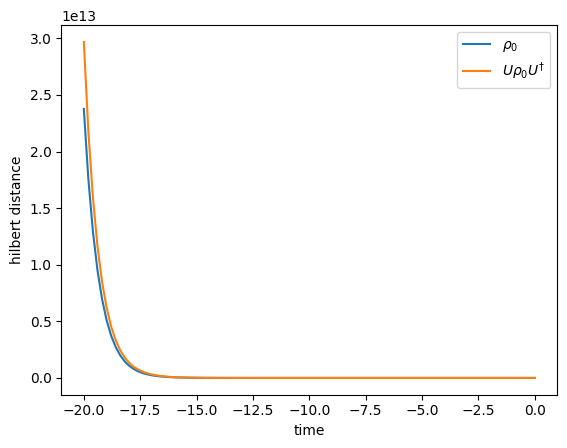

In [10]:
# calculation of Hilbert Distances

hilbert_distance = []
qmpe_dist = []

for state in medata.states:
  dis = qt.hilbert_dist(state,final_state)
  hilbert_distance.append(dis)

for state in qmpedata.states:
  dis = qt.hilbert_dist(state,final_state)
  qmpe_dist.append(dis)

plt.plot(tlist,hilbert_distance,label=r'$\rho_0$')
plt.plot(tlist,qmpe_dist,label=r'$U\rho_0U^{\dagger}$')
plt.xlabel('time')
plt.ylabel('hilbert distance')
plt.legend()
plt.show()

Here we were not able observe Mpemba effect since $\lambda_2 \notin \mathbb{R}$.

### Acceleration to Stationary State in Quantum Ising Model

$$ H = \Omega S_x - \Delta S_z + \frac{V}{N} S_z^{2}$$ 

The parameters chosen are $\Delta=-1$, $V=3$, $\kappa=1$ (all in units of $\Omega$).

In [11]:
def hamiltonian_ising(N,omega,delta,V):
  sx = 0.5*qt.operators.sigmax()
  #sy = 0.5*qt.operators.sigmay()
  sz = 0.5*qt.operators.sigmaz()
  I = qt.operators.identity(2)

  ising_ham = qt.tensor([I*0]*N)
  for i in range(N):
    hz = qt.tensor([sz if j==i else I for j in range(N)])
    hx = qt.tensor([sx if j==i else I for j in range(N)])
    ising_ham += -1*delta*hz+omega*hx
    for j in range(i + 1, N):
        hzz = qt.tensor([sz if k == i or k == j else I for k in range(N)]) # assume obc
        ising_ham += (V/N)*hzz
  
  return(ising_ham)

In [76]:
# Hamiltonian
omega = np.pi
N = 5
delta = -1*omega
V = 3*omega
hamiltonian=hamiltonian_ising(N,omega,delta,V)

# collapse operator
kappa = 1
c_ops = [qt.tensor([sm if i==j  else I for j in range(N)]) for i in range(N)]
c_ops = [np.sqrt(kappa) * c_op for c_op in c_ops]

In [77]:
# Linbladian
L = qt.liouvillian(hamiltonian, c_ops)
L_dag = qt.liouvillian(hamiltonian, c_ops).dag()

In [78]:
# diagonalization using qutip
val,mat = L_dag.eigenstates()
tol = 1e-8
real_vals = np.where(np.abs(val.imag)<tol,val.real,val)
real_vals = np.where(np.abs(real_vals.real)<tol,real_vals.imag,real_vals)
print('eigen values\n', real_vals)

eigen values
 [-4.52488251+0.j         -4.069693  -7.26504897j -4.069693  -7.26504897j
 ... -0.80651698+4.49220493j -0.73479962+0.j
  0.        +0.j        ]


In [79]:
l2indx = np.argsort(abs(real_vals))[1]
l2 = mat[l2indx].full().reshape(2**N,2**N)

L2 = qt.Qobj(np.round(l2,3))
alphas,phis = L2.eigenstates()

print(alphas)

[-0.06776188  0.02906667  0.04249446  0.04249446  0.04249446  0.04249446
  0.11849191  0.13073343  0.13073343  0.13073343  0.13073343  0.13214113
  0.13214113  0.13214113  0.13214113  0.13214113  0.19926228  0.19994071
  0.19994071  0.19994071  0.19994071  0.20285887  0.20285887  0.20285887
  0.20285887  0.20285887  0.25245196  0.2558314   0.2558314   0.2558314
  0.2558314   0.30048906]


In [80]:
# init_state = qt.tensor([qt.ket('0')]*N)
# init_state

init_state =  qt.rand_ket(2**N)
init_state.dims = [[2]*N,[1]]
init_state

Quantum object: dims = [[2, 2, 2, 2, 2], [1]], shape = (32, 1), type = ket
Qobj data =
[[ 0.08213557+0.06865909j]
 [ 0.18623962-0.21011483j]
 [-0.08983334+0.12637672j]
 [ 0.19853897+0.05854721j]
 [ 0.14749902-0.03361819j]
 [ 0.05601631-0.01583844j]
 [ 0.07212638+0.0389155j ]
 [ 0.1941602 -0.12200578j]
 [-0.18458479-0.17348733j]
 [ 0.20519545+0.04515011j]
 [-0.06022576+0.17462033j]
 [ 0.02387009-0.19116556j]
 [ 0.05766192-0.17614702j]
 [ 0.1707507 -0.06603388j]
 [-0.17844792+0.12123899j]
 [-0.01555761-0.00961907j]
 [-0.08089772-0.16335919j]
 [-0.09206594+0.15154238j]
 [-0.05617274+0.01432961j]
 [ 0.18520638-0.07419284j]
 [ 0.06970881-0.19027753j]
 [-0.06995894-0.15775382j]
 [ 0.19507356-0.15755541j]
 [-0.1806568 -0.08640593j]
 [ 0.13402268+0.00787206j]
 [-0.00075536-0.09127757j]
 [ 0.12127105-0.17376558j]
 [-0.00887905-0.1317284j ]
 [ 0.02456425-0.05436914j]
 [-0.13877189+0.16968601j]
 [ 0.13119534-0.13978695j]
 [-0.04768725+0.04429561j]]

In [81]:
phi1 = phis[0]
alpha1 = abs(alphas[0])

phi2 = phis[2]
alpha2 = abs(alphas[2])

s = np.arctan(np.sqrt(alpha1/alpha2))
s

0.9010104782601808

In [82]:
phi1.dims = init_state.dims
phi2.dims = init_state.dims

In [83]:
phi1

Quantum object: dims = [[2, 2, 2, 2, 2], [1]], shape = (32, 1), type = ket
Qobj data =
[[ 0.01266836+0.j        ]
 [-0.04530191-0.00064284j]
 [-0.04530191-0.00064284j]
 [ 0.10006642+0.01934566j]
 [-0.04530191-0.00064284j]
 [ 0.10006642+0.01934566j]
 [ 0.10006642+0.01934566j]
 [-0.18290828-0.05628331j]
 [-0.04530191-0.00064284j]
 [ 0.10006642+0.01934566j]
 [ 0.10006642+0.01934566j]
 [-0.18290828-0.05628331j]
 [ 0.10006642+0.01934566j]
 [-0.18290828-0.05628331j]
 [-0.18290828-0.05628331j]
 [ 0.26447094+0.10954984j]
 [-0.04530191-0.00064284j]
 [ 0.10006642+0.01934566j]
 [ 0.10006642+0.01934566j]
 [-0.18290828-0.05628331j]
 [ 0.10006642+0.01934566j]
 [-0.18290828-0.05628331j]
 [-0.18290828-0.05628331j]
 [ 0.26447094+0.10954984j]
 [ 0.10006642+0.01934566j]
 [-0.18290828-0.05628331j]
 [-0.18290828-0.05628331j]
 [ 0.26447094+0.10954984j]
 [-0.18290828-0.05628331j]
 [ 0.26447094+0.10954984j]
 [ 0.26447094+0.10954984j]
 [-0.30351452-0.13272863j]]

In [84]:
# R=np.zeros((2**N,2**N),dtype=complex)
# R[:,0]+=phi1.full().flatten()
# R = qt.Qobj(R)

R = phi1*init_state.dag()
R

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = False
Qobj data =
[[ 0.00104052-0.0008698j   0.00235935+0.00266181j -0.00113804-0.00160099j
  ... -0.00175801-0.00214964j  0.00166203+0.00177087j
  -0.00060412-0.00056115j]
 [-0.00376503+0.00305759j -0.00830194-0.00963832j  0.00398838+0.00578286j
  ...  0.00617755+0.00777631j -0.00585354-0.00641695j
   0.00213185+0.00203733j]
 [-0.00376503+0.00305759j -0.00830194-0.00963832j  0.00398838+0.00578286j
  ...  0.00617755+0.00777631j -0.00585354-0.00641695j
   0.00213185+0.00203733j]
 ...
 [ 0.02924406-0.0091604j   0.02623692+0.07597179j -0.00991376-0.0432642j
  ... -0.01811206-0.06007946j  0.01938372+0.05134201j
  -0.00775932-0.01693903j]
 [ 0.02924406-0.0091604j   0.02623692+0.07597179j -0.00991376-0.0432642j
  ... -0.01811206-0.06007946j  0.01938372+0.05134201j
  -0.00775932-0.01693903j]
 [-0.03404237+0.00993729j -0.02863818-0.08849223j  0.01049191+0.05028063j
  ...  0.01959709+0.06992117j -

In [85]:
arg =(-s*1j)*(phi1*phi2.dag()+phi2*phi1.dag())
Us = arg.expm()
R.dims = Us.dims
U = Us*R
U

Quantum object: dims = [[2, 2, 2, 2, 2], [2, 2, 2, 2, 2]], shape = (32, 32), type = oper, isherm = False
Qobj data =
[[ 6.45975610e-04-0.00053999j  1.46472773e-03+0.0016525j
  -7.06516568e-04-0.00099392j ... -1.09140600e-03-0.00133454j
   1.03181829e-03+0.00109939j -3.75048235e-04-0.00034837j]
 [-1.40959672e-03+0.0024778j  -6.60301178e-03-0.00350724j
   3.41807232e-03+0.00231608j ...  5.04230190e-03+0.00294074j
  -4.57482811e-03-0.00226541j  1.60219921e-03+0.00066092j]
 [-2.68026029e-03+0.00280021j -7.54477352e-03-0.00681398j
   3.73964285e-03+0.00418736j ...  5.67444981e-03+0.00554955j
  -5.28186585e-03-0.00450401j  1.89373484e-03+0.0014027j ]
 ...
 [ 1.17129867e-02+0.00039203j -1.37970687e-04+0.03073712j
   1.89309018e-03-0.01686831j ...  1.06063375e-03-0.02397391j
   5.03243944e-04+0.02098126j -6.58367927e-04-0.00709476j]
 [ 2.34998868e-02+0.00281421j -5.59266741e-03+0.06182224j
   6.72594819e-03-0.03361335j ...  6.27966256e-03-0.04805445j
  -2.61549875e-03+0.04230337j -9.78771288e-

In [92]:
# solving master equation
final_state = qt.steadystate(hamiltonian,c_ops) # steady state solution 

tlist = omega*np.linspace(0, 4, 5000)
medata = qt.mesolve(hamiltonian, init_state, tlist, c_ops, []) # initial state  = |0>
qmpedata = qt.mesolve(hamiltonian, U*init_state, tlist, c_ops, []) # Mpemba unitary rotated state

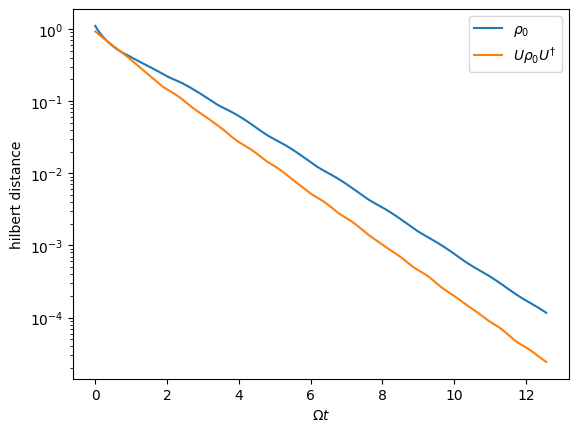

In [93]:
# calculation of Hilbert Distances

hilbert_distance = []
qmpe_dist = []

#hs_max = np.sqrt(2 *(1-1/(2**N)))

for state in medata.states:

  dis = (np.trace((state-final_state)**2))**(1/2)
  #dis=qt.hilbert_dist(state,final_state)
  hilbert_distance.append(dis)

for state in qmpedata.states:
  #dis = qt.hilbert_dist(state,final_state)
  dis = (np.trace((state-final_state)**2))**(1/2)
  qmpe_dist.append(dis)

plt.yscale('log')
plt.plot(tlist,hilbert_distance,label=r'$\rho_0$')
plt.plot(tlist,qmpe_dist,label=r'$U\rho_0U^{\dagger}$')
plt.xlabel(f'$\Omega t$')
plt.ylabel('hilbert distance')
plt.legend()
plt.show()